<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>RESUME SCREENING
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## PROBLEM STATEMENT:

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.
Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

Here,we will go through a machine learning project on Resume Screening with Python programming language.

## STEPS IMPLEMENTED

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.3 - [Statistical Summary](#Statistical_Summary)
4. **[EDA](#EDA)**    
5. **[Label Encoding for categorical Variable](#Label_Encoding_for_categorical_Variable)**
6. **[ML Models](#ML_Models)** 
7. **[Make Predictions](#Prediction_on_Models)** 

<a id='import_packages'></a>
## 1. Import Packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

<a id='Read_Data'></a>
## 2. Read the Data

In [54]:
# importing and reading the .csv file
resumeData = pd.read_csv('/Users/Admin/Desktop/CAPSTONE_1/UpdatedResumeDataSet.csv' ,encoding='utf-8')
#resumeData['cleaned_resume'] = ''
print("The number of rows are", resumeData.shape[0],"and the number of columns are", resumeData.shape[1])


The number of rows are 962 and the number of columns are 2


In [55]:
# print the first five rows of the data
resumeData.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Check for missing values<br>
                        3. Study summary statistics<br> 
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [56]:
# get the shape
print(resumeData.shape)

(962, 2)


In [57]:
# Checking the information of the dataframe(i.e the dataset)
resumeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


<a id='Missing_Data_Treatment'></a>
## 3.3. Missing Data Treatment

In [58]:
# get the count of missing values
missing_values = resumeData.isnull().sum()

# print the count of missing values
print(missing_values)

Category    0
Resume      0
dtype: int64


There are no missing values present.

<a id='Statistical_Summary'></a>
## 3.4. Statistical Summary
Here we take a look at the summary of each attribute.

In [59]:
# data frame with categorical features
resumeData.describe(include='object')

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [60]:
# Checking all the different unique values

resumeData.nunique()

Category     25
Resume      166
dtype: int64

Categories of resumes present in the dataset

In [61]:
print ("Displaying the distinct categories of resume -")
print (resumeData['Category'].unique())

print("total unique category: {}". format(len(resumeData['Category'].unique())))

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


Distinct categories of resume and the number of records belonging to each category

In [62]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeData['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
ETL Developer                40
Data Science                 40
Operations Manager           40
Blockchain                   40
Sales                        40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


<a id='EDA'></a>
## 4. EDA

Let’s visualize the number of categories in the dataset

<AxesSubplot:xlabel='count', ylabel='Category'>

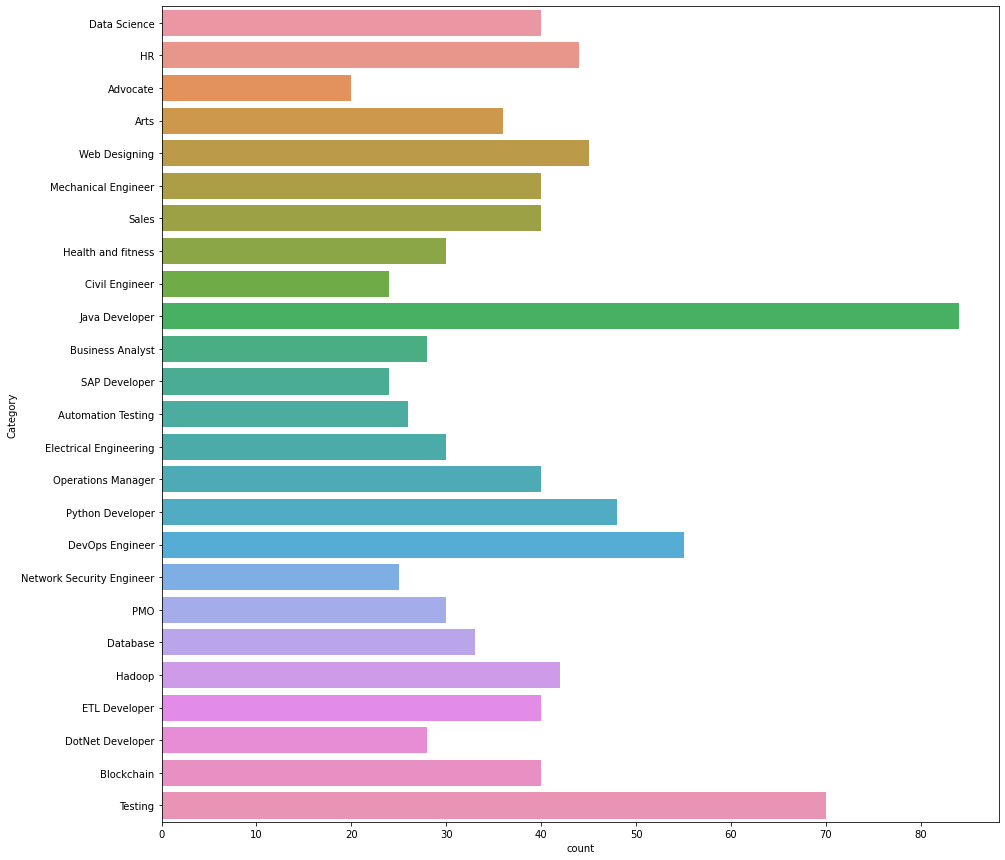

In [63]:
# Plotting the distribution of Categories as a Count Plot

plt.figure(figsize=(15,15))

sns.countplot(y="Category", data=resumeData)

Visualizing the distribution of categories

Java Developer               8.731809
Testing                      7.276507
DevOps Engineer              5.717256
Python Developer             4.989605
Web Designing                4.677755
HR                           4.573805
Hadoop                       4.365904
Mechanical Engineer          4.158004
ETL Developer                4.158004
Data Science                 4.158004
Operations Manager           4.158004
Blockchain                   4.158004
Sales                        4.158004
Arts                         3.742204
Database                     3.430353
Electrical Engineering       3.118503
PMO                          3.118503
Health and fitness           3.118503
Business Analyst             2.910603
DotNet Developer             2.910603
Automation Testing           2.702703
Network Security Engineer    2.598753
Civil Engineer               2.494802
SAP Developer                2.494802
Advocate                     2.079002
Name: Category, dtype: float64

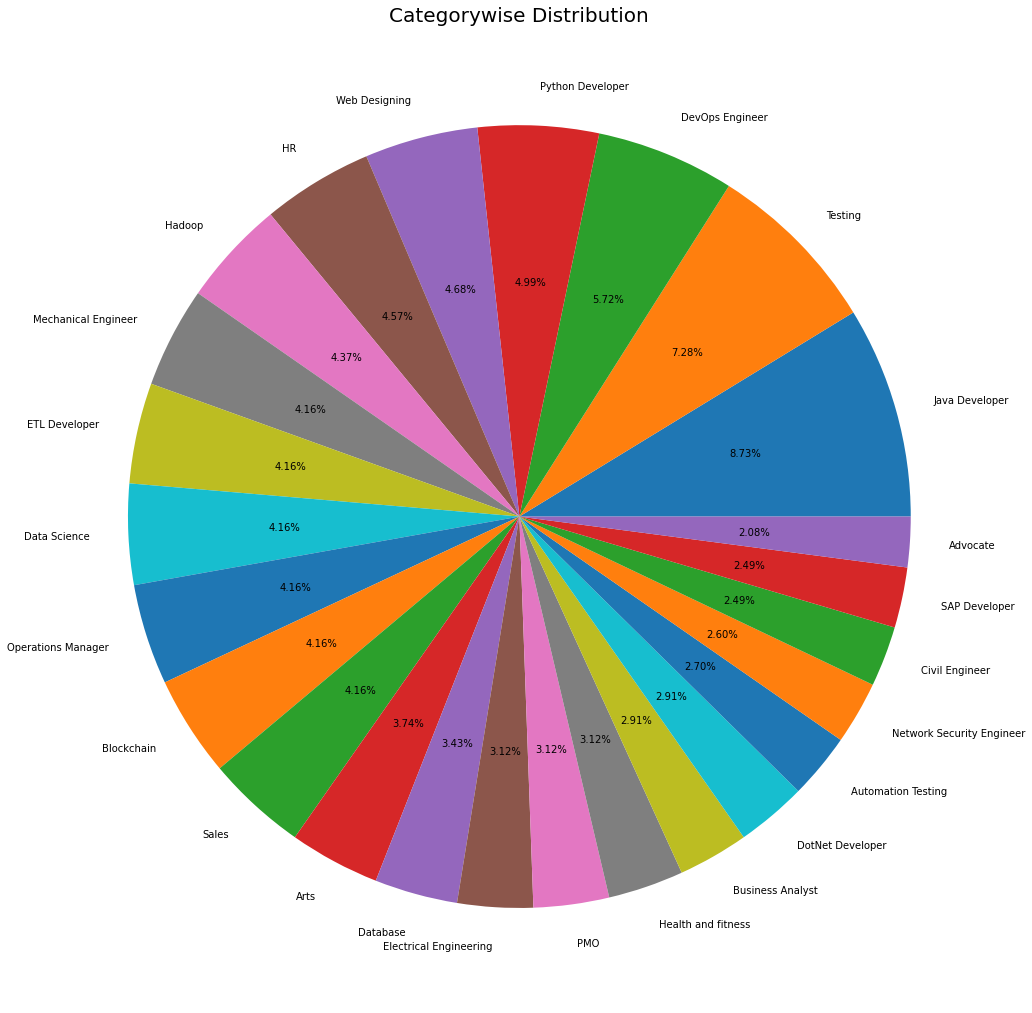

In [64]:
# Plotting the distribution of Categories as a Pie Plot

plt.figure(figsize = (18,18))
count = resumeData['Category'].value_counts()             #storing the count 
Labels = resumeData['Category'].value_counts().keys()     #storing the value of labels

plt.title("Categorywise Distribution", fontsize=20)
plt.pie(count, labels = Labels, autopct = '%1.2f%%')

resumeData["Category"].value_counts()*100/resumeData.shape[0]

# Defining a function to remove the URLs, hashtags, mentions, special letters, and punctuations

In [65]:
# Function to clean the resumeData

#re.sub() function stands for a substring and returns a string where all matching occurrences of the 
#specified pattern are replaced by the replace string.
#Multiple elements can be replaced using a list when we use this function.


import re
#re.compile('<title>(.*)</title>')

def clean(data):
    data = re.sub('httpS+s*', ' ', data)                                                # Removing the links
    data = re.sub('RT|cc', ' ', data)                                                   # Removing the RT and cc
    data = re.sub('#S+', ' ', data)                                                     # Removing the hashtags
    data = re.sub('@S+', ' ', data)                                                     # Removing the mentions
    data = data.lower()                                                                 # Changing text to lowercase
    data = ''.join([i if 32 < ord(i) < 128 else ' ' for i in data])                     # Removing the special characters
    data = re.sub('s+', 's', data)                                                      # Removing extra whitespaces
    data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', data) # Removing punctuations
    return data

resumeData['cleaned_resume'] = resumeData.Resume.apply(lambda x: clean(x))

In [66]:
resumeData.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad...


In [67]:
resumeData_1=resumeData.copy()

Now as we have cleared the dataset, the next task is to have a look at the Wordcloud. 

[('details', 488), ('exprience', 446), ('data', 416), ('company', 398), ('months', 394), ('description', 358), ('1', 290), ('project', 254), ('year', 252), ('january', 216), ('learning', 210), ('science', 208), ('les', 204), ('skill', 190), ('python', 176), ('maharashtra', 166), ('6', 164), ('machine', 156), ('education', 146), ('college', 146), ('arts', 144), ('university', 140), ('skills', 134), ('development', 134), ('web', 134), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('application', 120), ('team', 116), ('software', 116), ('using', 110), ('busines', 108), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('time', 100), ('used', 98), ('b', 98), ('c', 98), ('experience', 96), ('mumbai', 96), ('projects', 94), ('knowledge', 94), ('analysis', 92), ('technologies', 92), ('hr', 92), ('engineering', 90), ('pune', 90)]


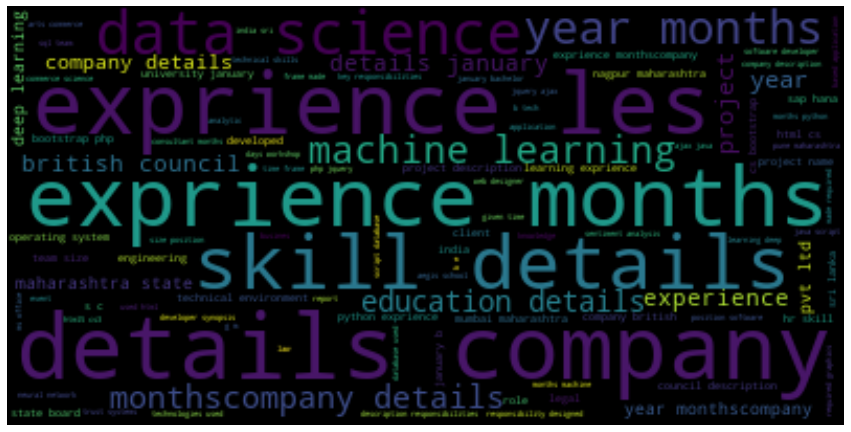

In [68]:
#Word Cloud is a data visualization technique used for representing text data in which 
#the size of each word indicates its frequency or importance.
#A Wordcloud represents the most numbers of words larger and vice versa

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

totalWords =[]                               #making an empty list totalwords to store our words
Sentences = resumeData['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = clean(Sentences[i])        #using the user-defined 'clean' fn to clean sentences
    cleanedSentences += cleanedText          #updating 'cleanedSentences'using 'cleanedText'
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:  #String of ASCIIchar considered punctuation char
            totalWords.append(word)
            
#Now we have to find the word freq distribution            
wordfreqdist = nltk.FreqDist(totalWords)            
mostcommon = wordfreqdist.most_common(50)           #find most common words
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)         #generating cleaned sent that we made above
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')             #used to display smoother image.
plt.axis("off")
plt.show()

<a id='Label_Encoding_for_categorical_Variable'></a>
## 5. Label Encoding for categorical Variable

Converting these words into categorical values

In [69]:
# Encoding the Category column using LabelEncoder

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])

In [70]:
resumeData.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e ...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control syste...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad...


In [71]:
resumeData.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
6     40
18    40
22    40
3     40
10    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [72]:
resumeData_1.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
ETL Developer                40
Data Science                 40
Operations Manager           40
Blockchain                   40
Sales                        40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [73]:
del resumeData_1     #clearing the space occupied 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeData['cleaned_resume'].values
requiredTarget = resumeData['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')   #cleaned_resume into vector format using tfidf
word_vectorizer.fit(requiredText)                                            #fitting vector on text
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


<a id="ML_Models"> </a>
## 6. ML Models

Training Machine Learning Model for Resume Screening

In [77]:
# Splitting the data into train, test, printing the shape of each
 
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=2, test_size = 0.2)
print('The shape of the training data', X_train.shape)
print('The shape of the test data',X_test.shape)


The shape of the training data (769, 7343)
The shape of the test data (193, 7343)


In [81]:
#Now let’s train the model and print the classification report:
#running KNeighborsClassifier with OneVsRest method

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [82]:
# Predicting the values using the model built with train data and checking the appropriate metrics

prediction = model.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.98


In [83]:
print("Classification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_test, prediction)))

Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       0.83      1.00      0.91        10
          11       0.83      1.00      0.91         5
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00

LR: 0.990909 
KNN: 0.963602 
CART: 0.994805 
SVM: 0.989610 


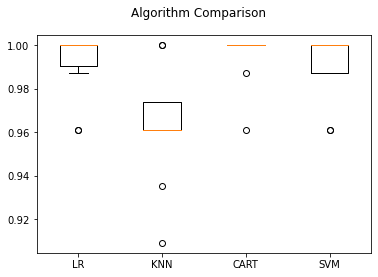

In [88]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))


# evaluate each model in turn
#using k-fold method of cross validation
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f " % (name, cv_results.mean()) 
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [89]:
#Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict (X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report (y_test, predictions))

LR
0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         8
     